In [ ]:
# Necessary packages
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data and merge
perfumes = pd.read_csv("data/1976_clean.csv")
perfume_embeddings = pd.read_csv("data/perfume_embedding_wa.csv")
df = pd.merge(perfume_embeddings, perfumes[['name','fragrance']], on='name', how='left')
df.head()

,name,0,1,2,3,4,5,6,7,8,...,759,760,761,762,763,764,765,766,767,fragrance
0,YSL MYSLF L’Absolu 极镜淡香精迷你瓶,-0.171343,0.693828,-0.587318,0.252570,-0.336122,0.324520,-0.452879,-0.046646,-0.720743,...,0.237949,-0.589665,0.585944,-0.444375,-0.293692,-0.274595,-0.538930,-0.350208,-0.128112,木质调
1,Versace Eros Najim 凡赛斯爱神星渝男性香精,0.240161,0.435522,0.393176,0.457134,0.119029,0.697291,-0.572273,-0.175493,-0.713116,...,0.062980,-0.471667,0.440021,-0.605441,-0.239165,-0.341971,0.355811,0.096299,0.048310,木质调
2,Messi 梅西同名男性淡香精,0.427016,0.391171,0.632848,0.481168,-0.063129,0.741318,-0.449902,0.042383,-0.841674,...,-0.196633,-0.960616,0.297056,-0.243689,0.088223,-0.097187,0.593530,-0.376192,-0.094925,木质调
3,YSL MYSLF L’Absolu 极镜淡香精,-0.171343,0.693828,-0.587318,0.252570,-0.336122,0.324520,-0.452879,-0.046646,-0.720743,...,0.237949,-0.589665,0.585944,-0.444375,-0.293692,-0.274595,-0.538930,-0.350208,-0.128112,木质调
4,Davidoff Essentials Blue 大卫杜夫蓝色境界男性淡香水,0.544305,0.693650,-0.030806,0.504751,-0.312654,0.309657,-0.704361,0.008640,-0.686220,...,-0.262427,-0.795518,0.323611,-0.462848,0.068941,-0.525255,0.369752,-0.353551,-0.011779,清新调


In [ ]:
# Split Information
item = df["name"].values
label = df["fragrance"].values
embeddings = df.drop(columns=["name", "fragrance"]).values

In [ ]:
# Compute Similarity Matrix
similarity_matrix = cosine_similarity(embeddings)

In [ ]:
# Separate similarities into same class and different class
same_class_sims = []
diff_class_sims = []

n = len(item)
for i in range(n):
    for j in range(i+1, n):
        sim = similarity_matrix[i, j]
        if label[i] == label[j]:
            same_class_sims.append(sim)
        else:
            diff_class_sims.append(sim)
            
print("Mean cosine similarity (same class):", np.mean(same_class_sims))
print("Mean cosine similarity (different class):", np.mean(diff_class_sims))

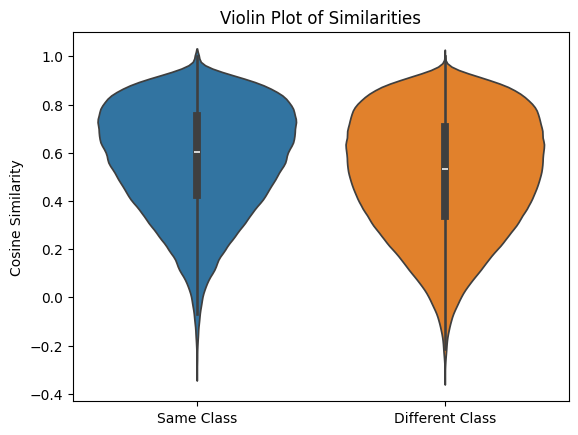

In [ ]:
# Violin Plot
sns.violinplot(data=[same_class_sims, diff_class_sims])
plt.xticks([0,1], ["Same Class", "Different Class"])
plt.ylabel("Cosine Similarity")
plt.title("Violin Plot of Similarities")
plt.savefig("img/perfume_embedding_wa_evaluation_violin.png", dpi=300)
plt.show()

C:\Users\wilson\AppData\Local\Temp\ipykernel_26384\546534677.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(same_class_sims, label="Same Class", shade=True)
C:\Users\wilson\AppData\Local\Temp\ipykernel_26384\546534677.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diff_class_sims, label="Different Class", shade=True)


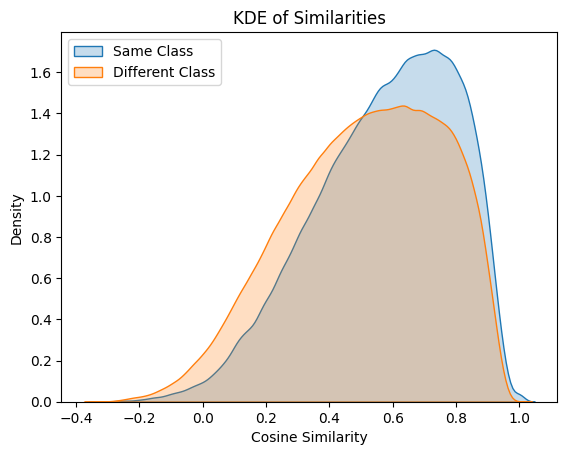

In [ ]:
# KDE Plot
sns.kdeplot(same_class_sims, label="Same Class", shade=True)
sns.kdeplot(diff_class_sims, label="Different Class", shade=True)
plt.xlabel("Cosine Similarity")
plt.ylabel("Density")
plt.title("KDE of Similarities")
plt.legend()
plt.savefig("img/perfume_embedding_wa_evaluation_KDE.png",dpi=300)
plt.show()